In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Introduction au Deep Learning et aux Réseaux de Neurones

Le Deep Learning est une sous-discipline de l'intelligence artificielle (IA) qui se concentre sur l'apprentissage automatique à partir de données. Il s'inspire de la structure et de la fonction du cerveau pour créer des algorithmes appelés réseaux de neurones. Ces réseaux sont capables d'apprendre à partir de grandes quantités de données et sont à la base de nombreuses applications modernes de l'IA, allant de la reconnaissance vocale et de la traduction automatique à la recommandation de produits et à la conduite autonome.

Un réseau de neurones est composé de neurones organisés en couches. Un perceptron est le type de réseau de neurones le plus simple, avec une seule couche d'entrée et une couche de sortie. Les perceptrons sont capables d'apprendre des modèles simples, mais leur capacité à apprendre des modèles complexes est limitée.

Pour apprendre des modèles plus complexes, nous pouvons utiliser un perceptron multicouche (MLP), qui ajoute une ou plusieurs couches de neurones cachés entre l'entrée et la sortie. Cela permet au réseau d'apprendre des représentations plus complexes des données.

Enfin, pour les tâches de traitement d'images, nous pouvons utiliser un réseau de neurones à convolution (CNN). Les CNN ajoutent des couches de convolution qui peuvent apprendre des caractéristiques spatiales des images, ce qui les rend particulièrement adaptés à la reconnaissance d'images.

Dans ce projet, nous allons appliquer ces concepts pour résoudre une tâche de reconnaissance d'images de chiffres manuscrits. Nous commencerons par un perceptron simple, puis nous ajouterons des couches pour créer un MLP, et enfin, nous expérimenterons avec un CNN. Nous évaluerons et comparerons les performances de ces différents modèles pour comprendre leurs forces et leurs faiblesses.

# Perceptron simple

Tout d'abord nous allons construire un modèle de perceptron simple à une couche pour la classification d'images de chiffres manuscrits. Nous utiliserons le jeu de données MNIST, qui est largement utilisé pour ce type de tâches. La bibliothèque que nous utiliserons principalement est TensorFlow, qui comprend Keras pour la construction de modèles de deep learning.

Ce code charge d'abord le jeu de données MNIST, normalise les images en divisant par 255 (pour que toutes les valeurs soient comprises entre 0 et 1), et convertit les étiquettes en catégories one-hot (par exemple, l'étiquette '5' devient [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]).

Ensuite, il crée un modèle de perceptron simple avec une seule couche Dense. La couche Dense a 10 neurones (un pour chaque classe possible de 0 à 9) et utilise l'activation softmax pour convertir les scores de chaque neurone en probabilités.

Ensuite, il compile le modèle avec l'optimiseur Adam et la perte d'entropie croisée catégorique, qui est couramment utilisée pour les tâches de classification multiclasse.

Enfin, il entraîne le modèle avec les images et les étiquettes d'entraînement, et évalue sa précision sur les images et les étiquettes de test.

1. **Courbe d'apprentissage** : Lorsque vous entraînez le modèle, Keras renvoie un objet `History` qui contient l'historique de la perte et des métriques à chaque époque. Vous pouvez utiliser cela pour tracer la courbe d'apprentissage. 

2. **Matrice de confusion** : Pour la matrice de confusion, vous devez d'abord prédire les classes des images de test en utilisant le modèle, puis utiliser une fonction telle que `confusion_matrix` de scikit-learn pour calculer la matrice de confusion.

Dans ce code, nous utilisons Matplotlib pour tracer les courbes d'apprentissage et Seaborn pour afficher la matrice de confusion. Les courbes d'apprentissage montrent l'évolution de la précision et de la perte sur les ensembles d'entraînement et de validation au fil des époques. La matrice de confusion montre le nombre de fois où chaque classe a été prédite correctement ou incorrectement.

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4739 - accuracy: 0.8760 - val_loss: 0.3121 - val_accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3034 - accuracy: 0.9153 - val_loss: 0.2848 - val_accuracy: 0.9205
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2833 - accuracy: 0.9205 - val_loss: 0.2745 - val_accuracy: 0.9230
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2735 - accuracy: 0.9227 - val_loss: 0.2685 - val_accuracy: 0.9260
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.2661 - accuracy: 0.9250
Test accuracy: 0.925000011920929


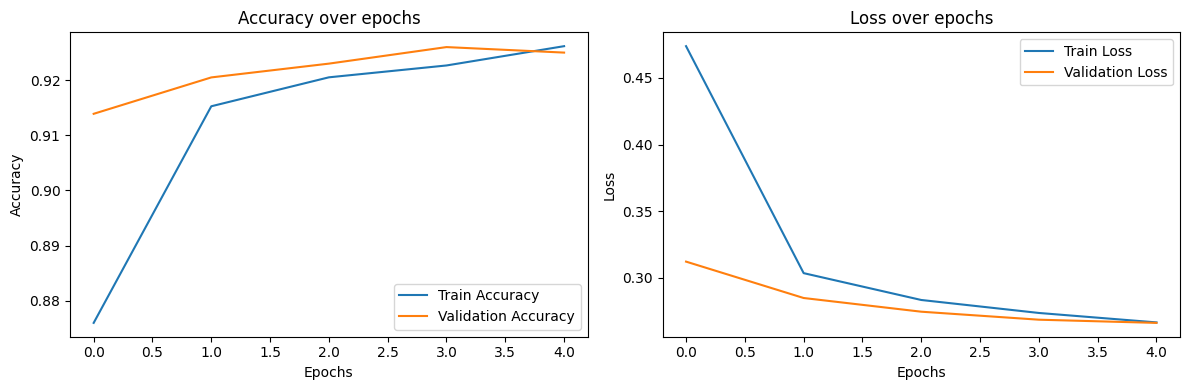

313/313 [==============================] - 0s 1ms/step


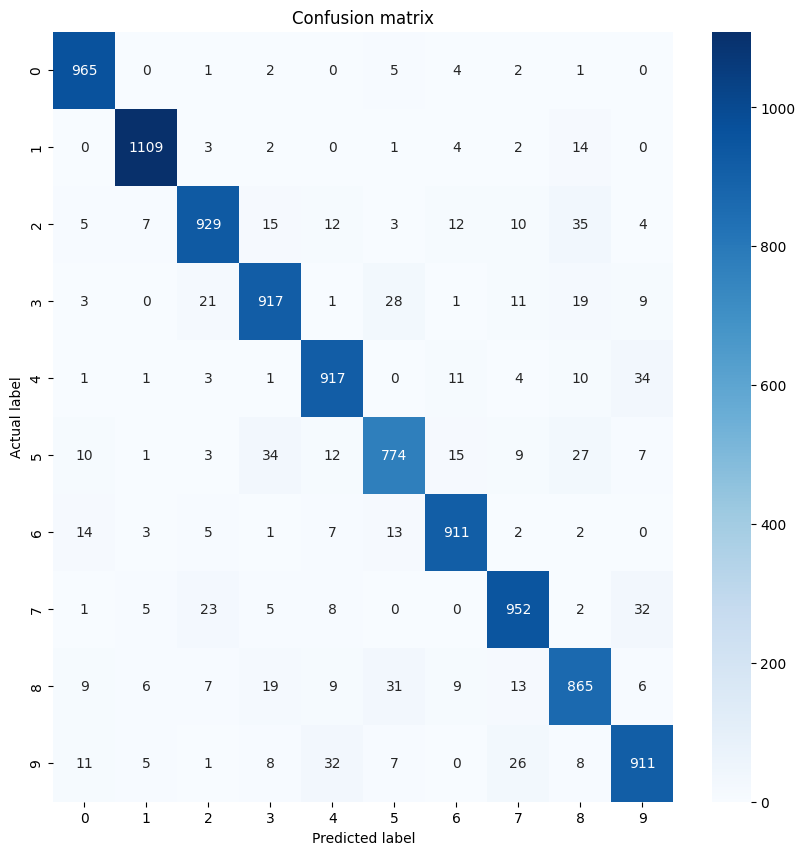

In [ ]:
# Charger le jeu de données MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normaliser les images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convertir les étiquettes en catégories one-hot
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Créer le modèle
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle et sauvegarder l'historique
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Évaluer le modèle
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Prédire les classes des images de test

predict_x = model.predict(test_images) 
classes_x = np.argmax(predict_x,axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(test_labels.argmax(axis=1), classes_x)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Perceptron à deux couches

Passons à la création d'un perceptron à deux couches. Dans ce cas, nous allons ajouter une couche cachée à notre modèle. Cela permettra au réseau de neurones d'apprendre des représentations plus complexes des données.

Dans ce code, nous avons ajouté une couche Dense avec 128 neurones et l'activation ReLU avant la couche de sortie. La fonction d'activation ReLU (Rectified Linear Unit) est couramment utilisée dans les réseaux de neurones profonds car elle permet d'apprendre des représentations non linéaires.

Après avoir entraîné ce modèle, vous pouvez répéter l'analyse que nous avons faite précédemment pour visualiser la courbe d'apprentissage et la matrice de confusion.

Pour explorer l'effet du nombre de neurones dans la couche cachée sur les performances du modèle, vous pouvez répéter ce processus avec différents nombres de neurones (par exemple, 64, 256, 512, etc.) et comparer les résultats.

L'ajout de plus de neurones à la couche cachée augmente la capacité du modèle à apprendre des représentations plus complexes, mais cela peut également conduire à un surapprentissage si le modèle devient trop complexe par rapport aux données. Vous devriez donc observer attentivement l'évolution de la perte et de la précision sur l'ensemble de validation pour détecter d'éventuels signes de surapprentissage (par exemple, si la perte de validation commence à augmenter alors que la perte d'entraînement continue à diminuer).

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2550 - accuracy: 0.9270 - val_loss: 0.1313 - val_accuracy: 0.9629
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1107 - accuracy: 0.9672 - val_loss: 0.1000 - val_accuracy: 0.9706
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0766 - accuracy: 0.9775 - val_loss: 0.0781 - val_accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0581 - accuracy: 0.9825 - val_loss: 0.0784 - val_accuracy: 0.9767
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0730 - accuracy: 0.9788
Test accuracy: 0.9787999987602234


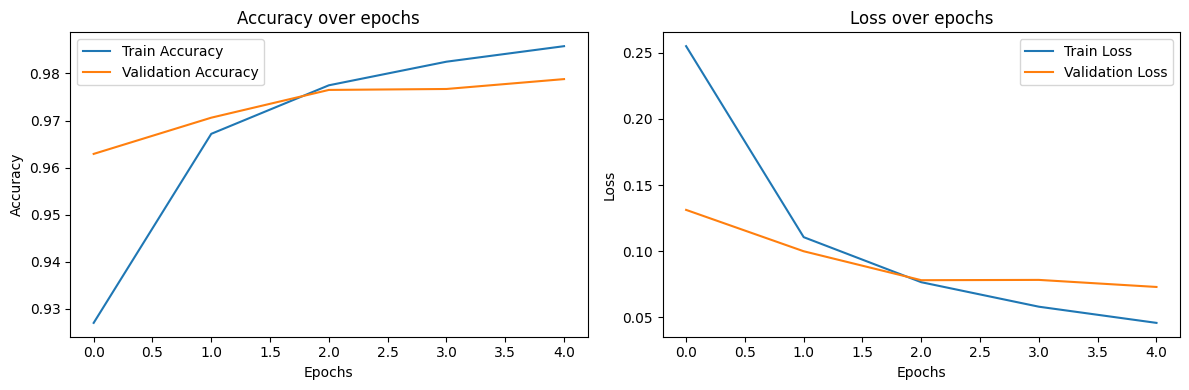

313/313 [==============================] - 0s 1ms/step


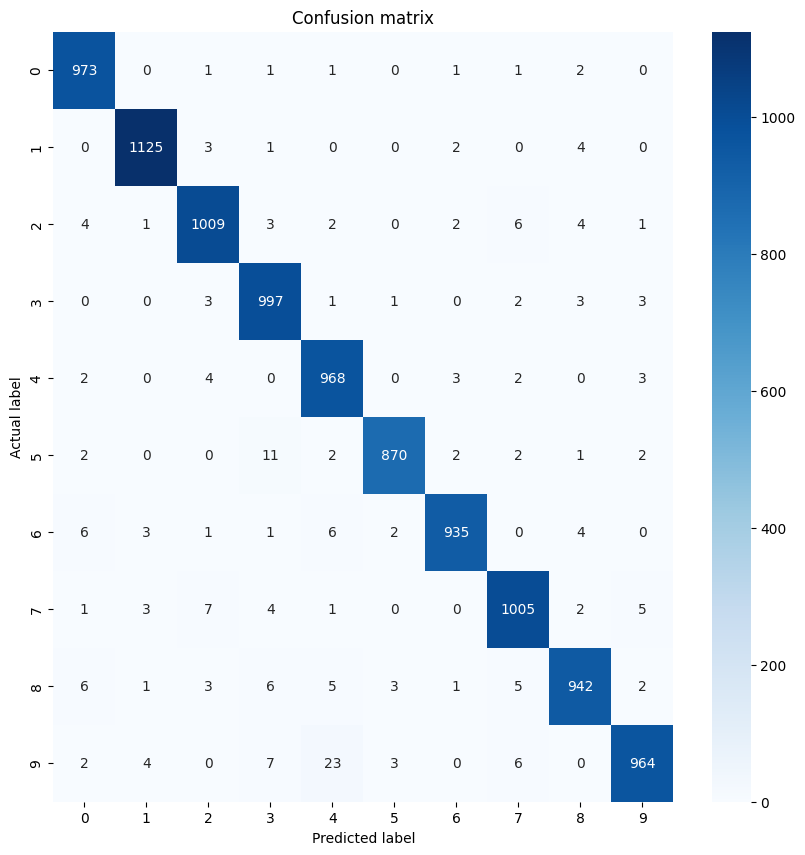

In [ ]:
# Créer le modèle
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Évaluer le modèle
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Prédire les classes des images de test

predict_x = model.predict(test_images) 
classes_x = np.argmax(predict_x,axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(test_labels.argmax(axis=1), classes_x)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Perception multicouche

Nous allons créer un réseau de neurones profond en ajoutant plus de couches cachées à notre modèle. Comme avant, nous allons expérimenter avec différents nombres de couches et de neurones par couche.

Dans ce modèle, nous avons trois couches cachées avec respectivement 128, 64 et 32 neurones. Vous pouvez modifier ces nombres pour expérimenter avec différentes architectures.

Comme avant, vous pouvez tracer la courbe d'apprentissage et la matrice de confusion pour évaluer les performances du modèle.

Notez que l'ajout de plus de couches cachées permet au réseau de neurones d'apprendre des représentations plus complexes des données, mais cela peut également rendre l'entraînement plus difficile et augmenter le risque de surapprentissage. Il est donc important de surveiller attentivement l'évolution de la perte et de la précision sur l'ensemble de validation.

De plus, lorsque vous expérimentez avec différentes architectures, vous pouvez constater que les performances du modèle ne s'améliorent pas toujours lorsque vous ajoutez plus de couches ou de neurones. Cela est dû au fait que la capacité du modèle doit être adaptée à la complexité des données. Si le modèle est trop simple, il ne pourra pas apprendre les patterns dans les données (sous-apprentissage), mais s'il est trop complexe, il risque de mémoriser les données d'entraînement au lieu d'apprendre à généraliser à partir de celles-ci (surapprentissage).

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2505 - accuracy: 0.9262 - val_loss: 0.1255 - val_accuracy: 0.9621
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1075 - accuracy: 0.9675 - val_loss: 0.0848 - val_accuracy: 0.9736
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0758 - accuracy: 0.9762 - val_loss: 0.1417 - val_accuracy: 0.9578
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0603 - accuracy: 0.9803 - val_loss: 0.0917 - val_accuracy: 0.9724
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0786 - accuracy: 0.9789
Test accuracy: 0.9789000153541565


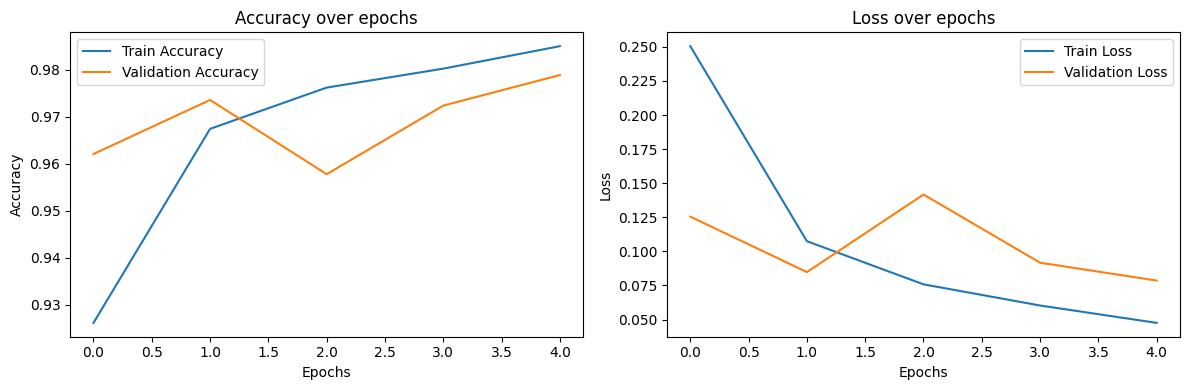

313/313 [==============================] - 0s 1ms/step


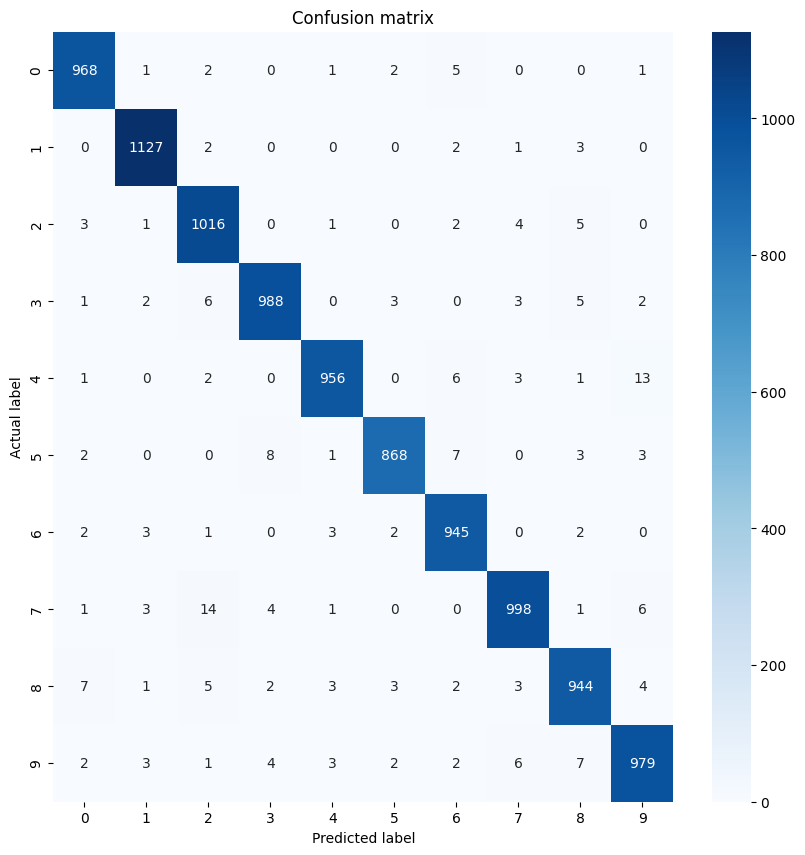

In [ ]:
# Créer le modèle
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Évaluer le modèle
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Prédire les classes des images de test

predict_x = model.predict(test_images) 
classes_x = np.argmax(predict_x,axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(test_labels.argmax(axis=1), classes_x)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Réseau de neurones à convolution

Parfait, passons à la construction d'un réseau de neurones à convolution (Convolutional Neural Network ou CNN). Les CNN sont particulièrement adaptés pour le traitement des images car ils sont capables de capturer les caractéristiques spatiales des images grâce à l'utilisation de filtres convolutifs.

Dans ce modèle, nous avons une couche de convolution avec 32 filtres, suivie d'une couche de pooling pour réduire la dimensionnalité de l'image. Ensuite, nous avons une couche Flatten pour convertir les cartes de caractéristiques 2D en vecteurs 1D, suivie de deux couches denses comme dans les modèles précédents.

La couche de convolution apprend à extraire des caractéristiques spatiales des images, comme les contours, les textures, les motifs, etc. Le pooling réduit la dimensionnalité de ces caractéristiques tout en conservant les informations les plus importantes.

Comme avant, vous pouvez tracer la courbe d'apprentissage et la matrice de confusion pour évaluer les performances du modèle. Vous pouvez également expérimenter avec différents nombres de filtres, tailles de filtres, tailles de pooling, etc., pour voir comment ils affectent les performances du modèle.

Epoch 1/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1747 - accuracy: 0.9486 - val_loss: 0.0654 - val_accuracy: 0.9789
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0599 - accuracy: 0.9816 - val_loss: 0.0536 - val_accuracy: 0.9824
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0404 - accuracy: 0.9870 - val_loss: 0.0558 - val_accuracy: 0.9810
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0452 - val_accuracy: 0.9852
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0513 - accuracy: 0.9847
Test accuracy: 0.9847000241279602


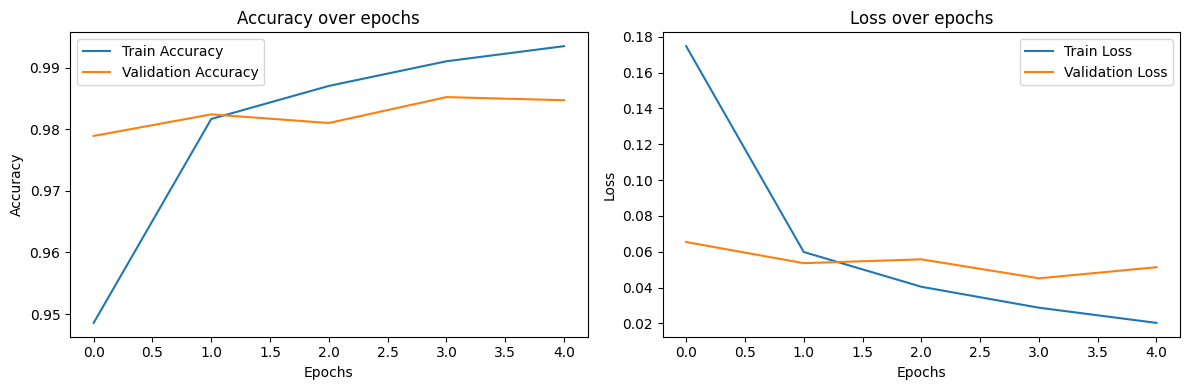

313/313 [==============================] - 1s 3ms/step


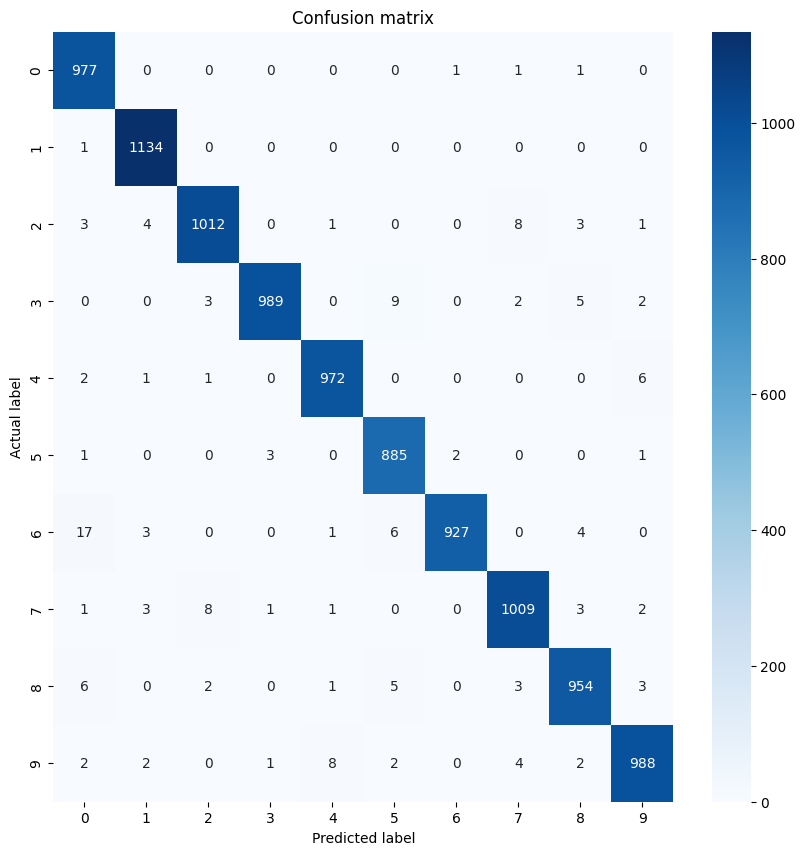

In [ ]:
# Reshape the images to have 1 color channel
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Créer le modèle
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Évaluer le modèle
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Prédire les classes des images de test

predict_x = model.predict(test_images) 
classes_x = np.argmax(predict_x,axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(test_labels.argmax(axis=1), classes_x)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()